# Bank marketing Data Set

<a href='http://archive.ics.uci.edu/ml/datasets/Bank+Marketing'>Data Set</a>

<a href='https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8'>Susan Li</a>

<p>Attribute Information:</p>

<p>Input variables:</p>
    
    
### bank client data:
<ol>
<li>age (numeric)</li>
<li>job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')</li>
<li>marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)</li>
<li>education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')</li>
<li>default: has credit in default? (categorical: 'no','yes','unknown')</li>
<li>housing: has housing loan? (categorical: 'no','yes','unknown')</li>
<li>loan: has personal loan? (categorical: 'no','yes','unknown')</li>
</ol>

### related with the last contact of the current campaign:
<ol>
<li value="8">contact: contact communication type (categorical: 'cellular','telephone')</li>
<li>month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')</li>
<li>day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri'</li>
<li>duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</li>
</ol>

### other attributes:
<ol>
<li value="12">campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).</li>
<li>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).</li>
<li>previous: number of contacts performed before this campaign and for this client (numeric).</li>
<li>poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success').</li>
</ol>

### social and economic context attributes
<ol>
<li value='16'>emp.var.rate: employment variation rate - quarterly indicator (numeric)</li>
<li>cons.price.idx: consumer price index - monthly indicator (numeric)</li>
<li>cons.conf.idx: consumer confidence index - monthly indicator (numeric)</li>
<li>euribor3m: euribor 3 month rate - daily indicator (numeric)</li>
<li>nr.employed: number of employees - quarterly indicator (numeric)</li>
</ol>

### Output variable (desired target):
<ol>
<li value='21'>y - has the client subscribed a term deposit? (binary: 'yes','no')</li>
</ol>

### References (to be moved)

<p>[1] [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014</p>

<p>[2] Bank Marketing Data Set, Machine Learning Repository, http://archive.ics.uci.edu/ml/datasets/Bank+Marketing, accessed: 2020-07-15</p>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data=pd.read_csv('bank.csv',header=0,sep=';')
data=data.dropna()
print(data.shape)
print(list(data.columns))

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


### Predict variable

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”) The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

### Data exploration

In [30]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

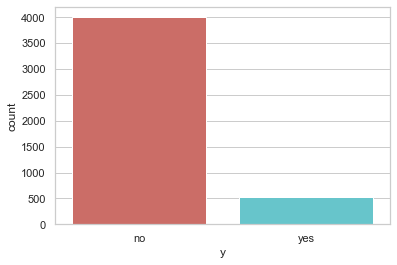

<Figure size 432x288 with 0 Axes>

In [31]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [7]:
count_no_sub = len(data[data['y']=='no'])
count_sub = len(data[data['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.47600088476001
percentage of subscription 11.523999115239992


In [8]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


Observations: The average age of customers who bought the term deposit is higher than that of the customers who didn’t. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit. We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [9]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286


In [10]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021


In [11]:
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977


### Visualizations

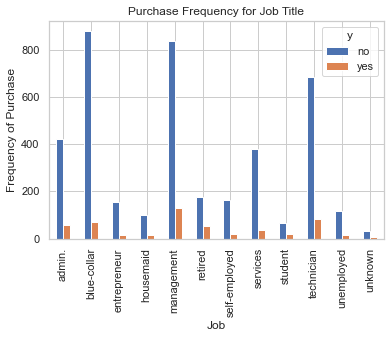

In [12]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

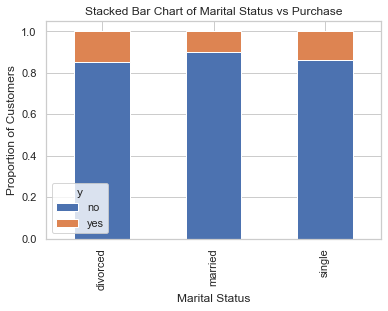

In [13]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.

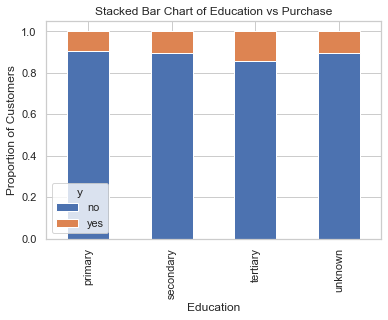

In [14]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

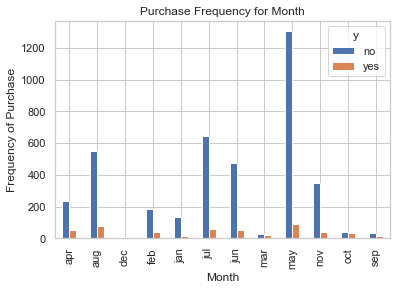

In [15]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_month_bar')

Month might be a good predictor of the outcome variable.

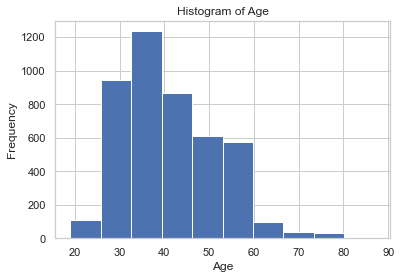

In [16]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40

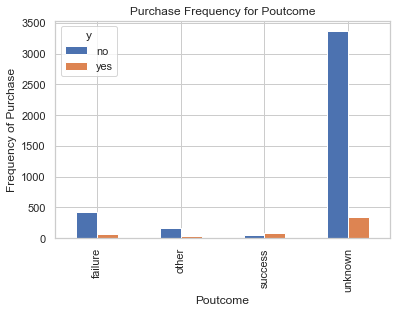

In [17]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

That is variables with only two values, zero an done

In [18]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [19]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

### Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.

Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.


conda install -c conda-forge imbalanced-learn

conda update --all

In [20]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']=='no']))
print("Number of subscription",len(os_data_y[os_data_y['y']=='yes']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='no'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='yes'])/len(os_data_X))

length of oversampled data is  5620
Number of no subscription in oversampled data 2810
Number of subscription 2810
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

### Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [21]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[False False False False False False False  True  True  True False False
 False False  True False  True False False  True  True  True  True  True
  True  True False False  True  True False False  True  True  True False
 False False False False False False False False False False False  True
  True False  True]
[27 32 29 30 25 31 28  1  1  1  2  5  7  4  1  6  1  3  8  1  1  1  1  1
  1  1 23 26  1  1 10  9  1  1  1 18 12 20 17 11 13 16 22 15 14 21 19  1
  1 24  1]


In [44]:
cols=['job_blue-collar', 'job_housemaid', 'default_no', 'contact_cellular',
      'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
print(X)
print(y)

      job_blue-collar  job_housemaid  default_no  contact_cellular  \
0                   0              0           1                 1   
1                   0              0           1                 0   
2                   0              0           1                 1   
3                   0              0           1                 1   
4                   1              0           1                 0   
...               ...            ...         ...               ...   
5615                0              0           1                 1   
5616                0              0           1                 0   
5617                0              0           1                 0   
5618                0              0           1                 1   
5619                0              0           1                 0   

      contact_telephone  month_apr  month_aug  month_dec  month_jul  \
0                     0          0          0          0          0   
1                

### Implementing the model

In [56]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(int),X.astype(int))
#z=y
#z[0:]=np.where(z[0:]=='yes',1,z[0:])
#z[0:]=np.where(z[0:]=='no',0,z[0:])
# data['target']=data['target'].replace({0:"No",1:"yes"})
#logit_model=sm.Logit(np.asarray(y),np.asarray(X))

result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.396913
         Iterations 7
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.427    
Dependent Variable:   y                AIC:              4493.2976
Date:                 2020-07-16 10:23 BIC:              4599.4430
No. Observations:     5620             Log-Likelihood:   -2230.6  
Df Model:             15               LL-Null:          -3895.5  
Df Residuals:         5604             LLR p-value:      0.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       7.0000                                      
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
job_blue-collar   -1.4374   0.1442  -9.9668 0.0000 -1.7200 -1.1547
job_housemaid     -1.4441   0.4359  -3.3126 0.0009 -2

The p-values for all variables are smaller than 0.05, therefore not to need to remove any variable.

### Logistic Regression Model fitting

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train.astype(int), y_train.astype(int))

LogisticRegression()

In [60]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test.astype(int), y_test.astype(int))))

Accuracy of logistic regression classifier on test set: 0.85


### Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test.astype(int), y_pred.astype(int))
print(confusion_matrix)

[[755  86]
 [174 671]]


### Compute precision, recall, F-measure and support

To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       841
           1       0.89      0.79      0.84       845

    accuracy                           0.85      1686
   macro avg       0.85      0.85      0.85      1686
weighted avg       0.85      0.85      0.85      1686



Interpretation: Of the entire test set, 85% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 85% of the customer’s preferred term deposits that were promoted.

### ROC Curve

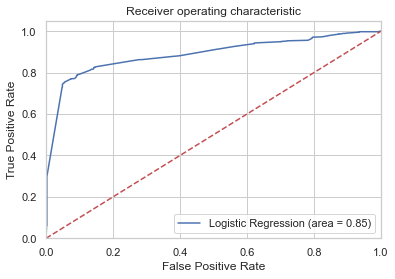

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test.astype(int), logreg.predict(X_test.astype(int)))
fpr, tpr, thresholds = roc_curve(y_test.astype(int), logreg.predict_proba(X_test.astype(int))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).